# Ant 2x4

In [1]:
import numpy as np
from utils import get_rewards_for_last_n_runs, average_and_confidence, plot_with_confidence_interval, plot_multiple_with_confidence_intervals
import os

/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
rewards = []
rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

In [ ]:
len(rewards_data[0]), len(rewards_data_mal[0])

In [ ]:
plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) ,save=True, title='Ant.2x4.comparison', labels= ['Normal', 'Malfunctioning'])

# Ant 4x2

In [15]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.4x2.0.001.350.0.99/'

n = 3  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path + '1-5runs/', n)
update_rewards_data = get_rewards_for_last_n_runs(base_path, n)
rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/1-5runs/', n)  
update_rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)

In [16]:
rewards = []
rewards_mal = []
update_rewards = []
update_rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    update_rewards.append(update_rewards_data[i][0])
    rewards_mal.append(rewards_data_mal[i][0])
    update_rewards_mal.append(update_rewards_data_mal[i][0])
    
rewards = np.array(rewards)
update_rewards = np.array(update_rewards)
rewards_mal = np.array(rewards_mal)
update_rewards_mal = np.array(update_rewards_mal)

avg_rewards, conf_rewards = average_and_confidence(rewards_data)
avg_update_rewards, conf_update_rewards = average_and_confidence(update_rewards_data)
avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)
avg_update_rewards_mal, conf_update_rewards_mal = average_and_confidence(update_rewards_data_mal)

In [24]:
avg_rewards.shape, avg_update_rewards.shape, avg_rewards_mal.shape, avg_update_rewards_mal.shape

((3000,), (60600,), (3000,), (600,))

In [65]:
update_rewards.shape, update_rewards_mal.shape, rewards.shape, rewards_mal.shape

((3, 60600), (3, 600), (3, 3000), (3, 3000))

In [55]:
b = np.array([[0,0,0]]).reshape(3,1)
a = update_rewards[:,0][:,np.newaxis]
print(a.shape,b.shape)
np.concatenate((b,a), axis=1)

(3, 1) (3, 1)


array([[   0.        ,  229.24684348],
       [   0.        ,   30.36249595],
       [   0.        , -249.43444299]])

In [66]:
update_rewards_reshaped = np.array([[0,0,0]]).reshape(3,1)
for x in range(update_rewards.shape[1]):
    if x % 100 == 0:
        # update_rewards_reshaped.append(avg_update_rewards[x])
        update_rewards_reshaped = np.concatenate((update_rewards_reshaped, update_rewards[:,x][:,np.newaxis]), axis=1)


print(update_rewards_reshaped.shape)
update_rewards_reshaped = np.array(update_rewards_reshaped[:,1:])
update_rewards_reshaped = np.array(update_rewards_reshaped[:,:-6])
print(update_rewards_reshaped.shape)

avg_update_rewards_reshaped, conf_update_rewards_reshaped = average_and_confidence([update_rewards_reshaped])




    

(3, 607)
(3, 600)


/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [67]:
print(update_rewards_reshaped.shape, avg_update_rewards_reshaped.shape, conf_update_rewards_reshaped.shape)

(3, 600) (600,) (600,)


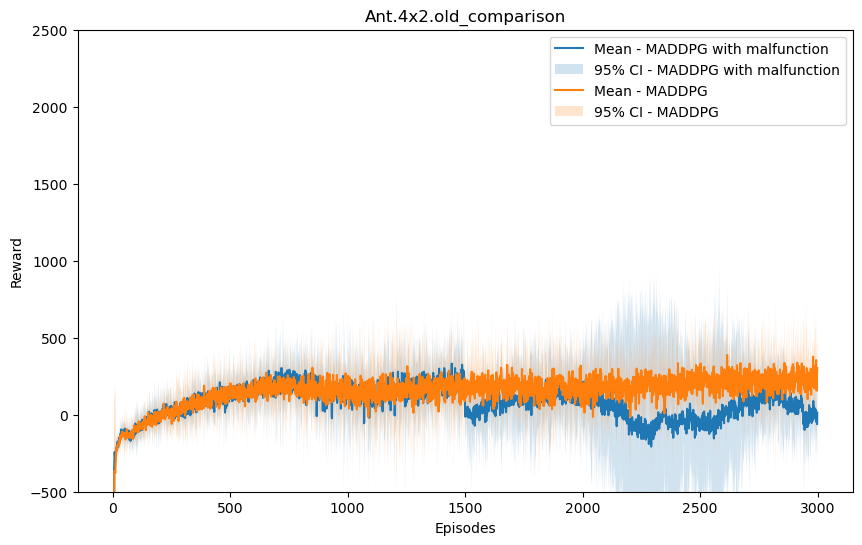

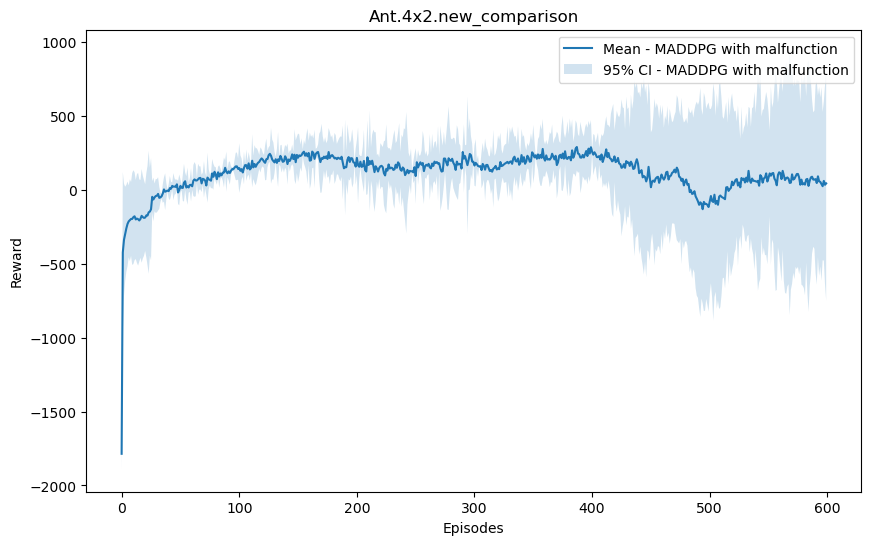

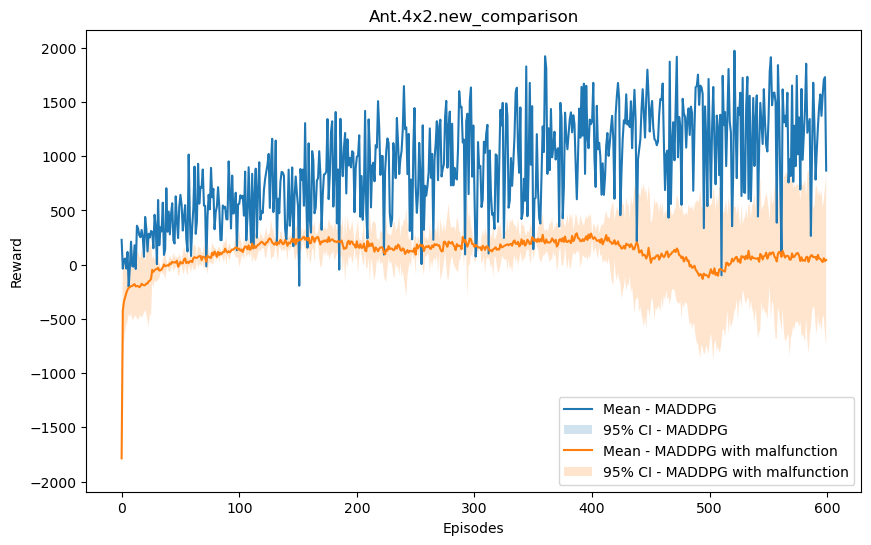

In [70]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
# plot_multiple_with_confidence_intervals([avg_update_rewards, avg_rewards], [conf_update_rewards, conf_rewards], np.arange(avg_update_rewards.shape[0]) ,ylim = (-500,2500), save= True,title='Ant.4x2.reward_functions',labels= ['MADDPG'], xlabel='Episodes', ylabel='Reward')

plot_multiple_with_confidence_intervals([avg_rewards_mal, avg_rewards], [conf_rewards_mal, conf_rewards], np.arange(avg_rewards_mal.shape[0]) ,ylim = (-500,2500), save= True,title='Ant.4x2.old_comparison',labels= ['MADDPG with malfunction', 'MADDPG'], xlabel='Episodes', ylabel='Reward')

plot_multiple_with_confidence_intervals([avg_update_rewards_mal], [conf_update_rewards_mal], np.arange(avg_update_rewards_mal.shape[0]) , save= True,title='Ant.4x2.new_comparison',labels= ['MADDPG with malfunction', 'MADDPG'], xlabel='Episodes', ylabel='Reward')

plot_multiple_with_confidence_intervals([avg_update_rewards_reshaped, avg_update_rewards_mal], [conf_update_rewards_reshaped, conf_update_rewards_mal], np.arange(avg_update_rewards_reshaped.shape[0]) , save= True,title='Ant.4x2.new_comparison',labels= ['MADDPG', 'MADDPG with malfunction'], xlabel='Episodes', ylabel='Reward')


# Cheetah 3x2

In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.2x3.0.001.350.0.99'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
rewards = []
# rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    # rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
# avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

In [ ]:
avg_rewards.shape, conf_rewards.shape

In [ ]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.2x3', labels='Normal')

# Cheetah 6x1

In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path1 ="/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.6x1.0.001.350.0.99/"
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path1, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
avg_rewards.shape, conf_rewards.shape

In [ ]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.6x1', labels='Normal')

# Humanoid 

In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Humanoid.9x8.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
avg_rewards.shape, conf_rewards.shape

In [ ]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.2x3', labels='Normal')

# Humanoid

In [ ]:
R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.6x1.0.001.350.0.99/', valid=False, aggrew=False, time=True)



In [ ]:
plt.plot(R0, label='R0')
plt.legend()

plt.xlabel('Episodes')
plt.ylabel('Value')
plt.title('Cheetah 6x1')
plt.savefig('../Multi-Agent/maddpg/experiments/plots/Cheetah6x1.png')
